# SAPSO library - a demonstration

This library allows to easily run SA and PSO experiments while providing convenient 2D plotting functions.
Cells below demonstrate a possible workflow.

In [2]:
import numpy as np

import sapso

from sapso.sa import SimulatedAnnealing
from sapso.pso import ParticleSwarmOptimization
from sapso.plot import contour_plot
from sapso.test import Ackley, Sphere, Beale, Himmelblau, Eggholder

## Demo: Simulated Annealing

In [ ]:
# select 2D test function
tfunc_sa = Ackley()

# default params
kwargs_sa = {
    'iterations'  : 5000,
    'seed'        : 42,
    'temperature' : None,  # uses default cooling scheme
    'step_size'   : 0.1,   # make steps of size 1% of area width
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

# instantiate SA manager class
SA = SimulatedAnnealing(tfunc_sa.objective, tfunc_sa.area, **kwargs_sa)

# optimize by simulated annealing
history_sa = SA.optimize()

# quickly print most important results
sapso.utils.print_results(history_sa, tfunc_sa)

In [ ]:
# examine history dict of simulated_annealing()
print(f"history.keys()  : {list(history_sa.keys())}")

# examine meta information of history dict
print(f"* meta.keys()   : {list(history_sa['meta'].keys())}")
print(f"* params.keys() : {list(history_sa['meta']['params'].keys())}")

## Demo: Particle Swarm Optimization

In [ ]:
# select 2D test function
tfunc_pso = Himmelblau()

# default params
kwargs_pso = {
    'iterations'  : 1000,
    'seed'        : 42,
    'n_particles' : 100, 
    'w'           : 0.75,  # inertia weight, in [0,1)
    'a_ind'       : 1.0,   # attraction individual best, typically in [1,3]
    'a_neigh'     : 1.6,   # attraction neighbour best, typically in [1,3]
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

# instantiate PSO manager class
PSO = ParticleSwarmOptimization(tfunc_pso.objective, tfunc_pso.area, **kwargs_pso)

# optimize by simulated annealing
history_pso = PSO.optimize()

# quickly print most important results
sapso.utils.print_results(history_pso, tfunc_pso)

In [ ]:
# examine history dict of particle_swarm_optimization()
print(f"history.keys()  : {list(history_pso.keys())}")

# examine meta information of history dict
print(f"* meta.keys()   : {list(history_pso['meta'].keys())}")
print(f"* params.keys() : {list(history_pso['meta']['params'].keys())}")

## Demo: plotting results

## Example: single plot

In [ ]:
import matplotlib.pyplot as plt

contour_plot(history_sa, tfunc_sa, title='')
contour_plot(history_pso, tfunc_pso, title='')

# save figure if desired
if False:
    plt.savefig('plots/example_single.png')

## Example: multiple plots

This is one possibility to create comparison plots.
For example, here two methods are compared on two different test functions.

In [5]:
# choose interesting test functions

tfun1 = Ackley()
tfun2 = Himmelblau() # TODO: eggholder makes troubles!

# run some experiments and gather data

hists = dict()
tfuncs = { tfun1.name : tfun1, tfun2.name: tfun2 }

# TODO: fine-tune kwargs_sa and kwargs_pso

kwargs_sa = {
    'iterations'  : 5000,
    'seed'        : 42,
    'temperature' : None,  # uses default cooling scheme
    'step_size'   : 0.1,
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

kwargs_pso = {
    'iterations'  : 1000,
    'seed'        : 42,
    'n_particles' : 100, 
    'w'           : 0.75,  # inertia weight, in [0,1)
    'a_ind'       : 1.0,   # attraction individual best, typically in [1,3]
    'a_neigh'     : 1.6,   # attraction neighbour best, typically in [1,3]
    'goal'        : 'min'  # 'min'/'max' for minimization/maximization
}

SA_exp1 = SimulatedAnnealing(tfuncs[tfun1.name].objective, tfuncs[tfun1.name].area, **kwargs_sa)
hists['SA_' + tfun1.name] = SA_exp1.optimize() # TODO: add function get_history that first optimizes or return hist
sapso.utils.print_results(hists['SA_' + tfun1.name], tfuncs[tfun1.name], end='\n\n')

PSO_exp1 = ParticleSwarmOptimization(tfuncs[tfun1.name].objective, tfuncs[tfun1.name].area, **kwargs_pso)
hists['PSO_' + tfun1.name] = PSO_exp1.optimize()
sapso.utils.print_results(hists['PSO_' + tfun1.name], tfuncs[tfun1.name], end='\n\n')

SA_exp2 = SimulatedAnnealing(tfuncs[tfun2.name].objective, tfuncs[tfun2.name].area, **kwargs_sa)
hists['SA_' + tfun2.name] = SA_exp2.optimize()
sapso.utils.print_results(hists['SA_' + tfun2.name], tfuncs[tfun2.name], end='\n\n')

PSO_exp2 = ParticleSwarmOptimization(tfuncs[tfun2.name].objective, tfuncs[tfun2.name].area, **kwargs_pso)
hists['PSO_' + tfun2.name] = PSO_exp2.optimize()
sapso.utils.print_results(hists['PSO_' + tfun2.name], tfuncs[tfun2.name])

optimum - SA @ Ackley:

* found    : pos: [-0.00348966  0.00716805]
           : val: 0.024240934400410197

* expected : pos: [0. 0.]
           : val: 0.0

optimum - PSO @ Ackley:

* found    : pos: [-0.00234321 -0.00105316]
           : val: 0.007441961083980431

* expected : pos: [0. 0.]
           : val: 0.0

optimum - SA @ Himmelblau:

* found    : pos: [2.99695817 1.99599575]
           : val: 0.0008575112277290733

* expected : pos: [3. 2.] | [-2.805118  3.131312] | [-3.77931  -3.283186] | [ 3.584428 -1.848126]
           : val: 0.0

optimum - PSO @ Himmelblau:

* found    : pos: [-2.80709735  3.13257654]
           : val: 0.000188333433043249

* expected : pos: [3. 2.] | [-2.805118  3.131312] | [-3.77931  -3.283186] | [ 3.584428 -1.848126]
           : val: 0.0


Now we can actually plot the obtained results given the histories and the test functions.

TypeError: Axis.set_ticklabels() takes 2 positional arguments but 3 were given

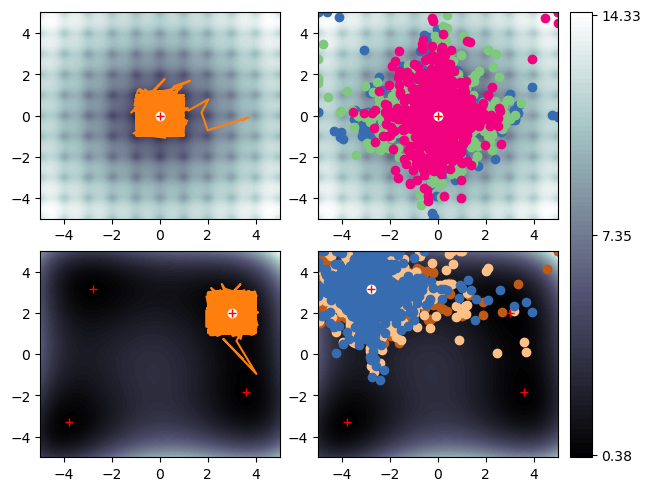

In [10]:
# plot results in a 2x2 plot

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, layout='constrained')

kwargs_plot = {
    'resolution'   : 100,
    'cmap_bg'      : 'bone',     # cmap for background
    'cmap_fg'      : 'Accent',    # cmap for traces of PSO plots
    'title'        : None,       # don't set title
    #'title'        : '',        # automatically set title
    'title_length' : 'short',    # title ignored if title is ''
}

cax = contour_plot(
    hists['SA_' + tfun1.name], tfuncs[tfun1.name], ax=axes[0, 0], **kwargs_plot
)

_ = contour_plot(
    hists['PSO_' + tfun1.name], tfuncs[tfun1.name], ax=axes[0, 1], **kwargs_plot
)

_ = contour_plot(
    hists['SA_'+ tfun2.name], tfuncs[tfun2.name], ax=axes[1, 0], **kwargs_plot
)

_ = contour_plot(
    hists['PSO_'+ tfun2.name], tfuncs[tfun2.name], ax=axes[1, 1], **kwargs_plot
)

cbar_ticks = [np.min(cax.cvalues), 0.5 * (np.min(cax.cvalues) + np.max(cax.cvalues)), np.max(cax.cvalues)]
cbar = fig.colorbar(cax, ax=axes[:,1], ticks=cbar_ticks)
cbar.ax.set_yticklabels(['min', 'median', 'max'], 'ca', rotation='vertical')

xlabels = ['', '', 'SA', 'PSO']
ylabels = [tfun1.name, '', tfun2.name, '']

for ax, ometh, tfun in zip(axes.flat, xlabels, ylabels):
    ax.set(xlabel=ometh, ylabel=tfun) # set labels for each subplot
    ax.label_outer()                  # hide x labels and tick labels for top plots and y ticks for right plots
    ax.set_aspect(1.0)                # fix aspect ratio of each plot

    
# save figure if desired
if False:
    plt.savefig('plots/example_multiple.png')